<a href="https://colab.research.google.com/github/tunahannaydin/library_management_system/blob/main/Veri_Yap%C4%B1lar%C4%B1_ve_Algoritmalar_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python'da Sıralı Tipler

In [ ]:
import sys

a = [1, 2, 3] #list
b = (1, 2, 3) #tuple
c = "123" #str

print(a, type(a), id(a), sys.getsizeof(a))
print(b, type(b), id(b), sys.getsizeof(b))
print(c, type(c), id(c), sys.getsizeof(c))


[1, 2, 3] <class 'list'> 138467541236544 88
(1, 2, 3) <class 'tuple'> 138467541059456 64
123 <class 'str'> 138467796994880 44


list, tuple ve str, hafızada tuttukları değerleri bir alt seviye dizi ile tutarlar.

# Alt Seviye diziler

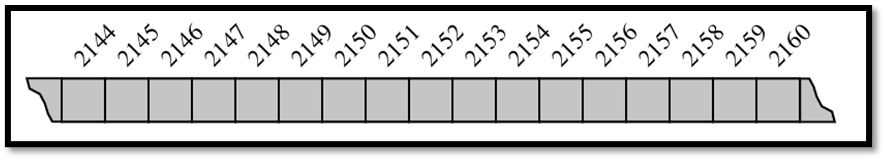

Belleğe erişim O(1) sürede, yani sabit zamanda yapılır.

In [ ]:
x = 5
y = 3

print(id(x))
print(id(y))

11642216
11642152


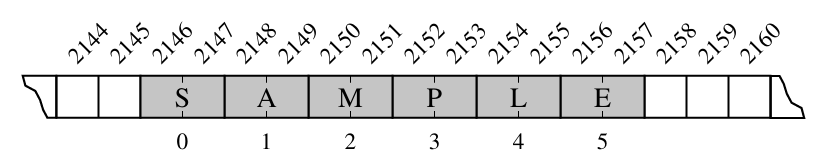

In [ ]:
my_list = [1,2,3,4,5,6,7,8,9]
print(my_list[2])

3


# Referans Dizileri

In [ ]:
bir_dizi = [1, 3.4, 'merhaba', True]
adlar = ['Rene', 'Joseph', 'Janet', 'Jonas', 'Helen', 'Virginia']

print(bir_dizi)
print(adlar)

[1, 3.4, 'merhaba', True]
['Rene', 'Joseph', 'Janet', 'Jonas', 'Helen', 'Virginia']


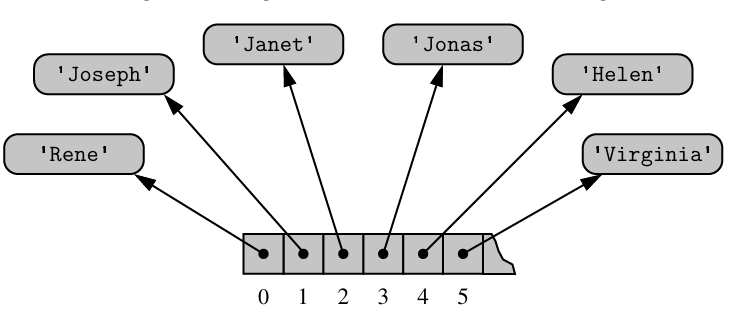

Dilimleme:

In [ ]:
primes = [2,3,5,7,11,13,17,19]
temp = primes[3:6]

print(primes)
print(temp)
print(id(primes[5]), "ve", id(temp[2]))

[2, 3, 5, 7, 11, 13, 17, 19]
[7, 11, 13]
11642472 ve 11642472


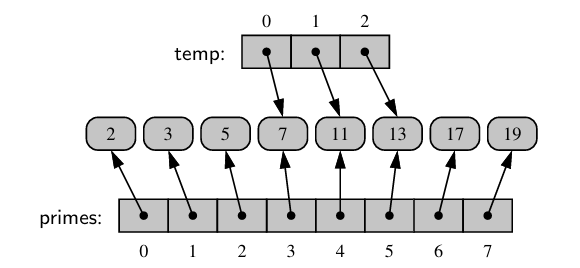

Dizideki elemanlar immutable olduğu için:

In [ ]:
primes = [2,3,5,7,11,13,17,19]
temp = primes[3:6]
temp[2] = 15

print(primes)
print(temp)
print(id(primes[5]))
print(id(temp[2]))

[2, 3, 5, 7, 11, 13, 17, 19]
[7, 11, 15]
11642472
11642536


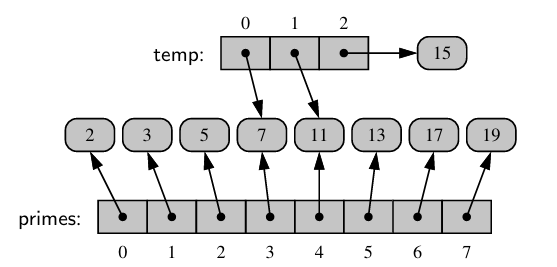

In [ ]:
primes = [2,3,5,7,11,13,17,19]
shallow_copy = list(primes)

print(id(primes))
print(id(shallow_copy))

print(primes)
print(shallow_copy)

primes[0] = 5

print(id(primes[0]))
print(id(shallow_copy[0]))

138467541232064
138467185791488
[2, 3, 5, 7, 11, 13, 17, 19]
[2, 3, 5, 7, 11, 13, 17, 19]
11642216
11642120


Operatör ile dizi oluşturma:

In [ ]:
counters = [0] * 8

print(counters)
print(id(counters[0]))
print(id(counters[3]))

counters[0] = 6
print(counters)
print(id(counters[0]))

[0, 0, 0, 0, 0, 0, 0, 0]
11642056
11642056
[6, 0, 0, 0, 0, 0, 0, 0]
11642248


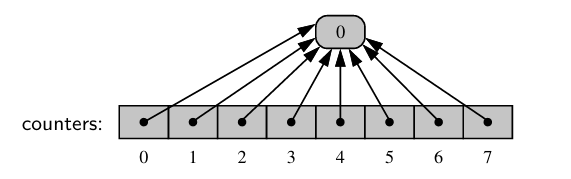

extend işlemi

In [ ]:
primes = [2,3,5,7,11,13,17,19]
extras = [23,29,31]

print(primes)
print(extras)

primes.extend(extras)

print(primes)
print(extras)

print(id(primes[8]))
print(id(extras[0]))

primes[8] = 0
print(primes)
print(extras)

[2, 3, 5, 7, 11, 13, 17, 19]
[23, 29, 31]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
[23, 29, 31]
11642792
11642792
[2, 3, 5, 7, 11, 13, 17, 19, 0, 29, 31]
[23, 29, 31]


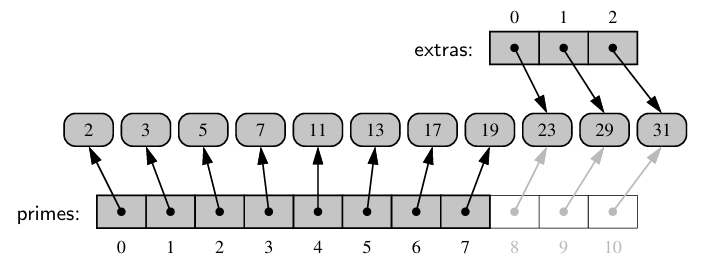

# Kompakt Dizi (Compact Array)

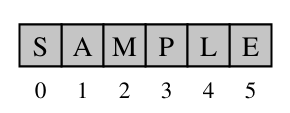

In [ ]:
import array as arr

primes = arr.array('i', [2,3,5,7,11,13,17,19])

print(primes)

array('i', [2, 3, 5, 7, 11, 13, 17, 19])


# Dinamik Dizi

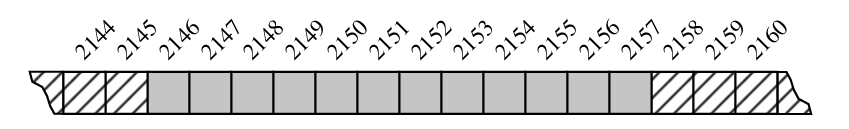

In [ ]:
import sys

data = []
for k in range(20):
  a = len(data)
  b = sys.getsizeof(data)
  print("Length:", a, ", Size in bytes:", b)
  data.append(k)

Length: 0 , Size in bytes: 56
Length: 1 , Size in bytes: 88
Length: 2 , Size in bytes: 88
Length: 3 , Size in bytes: 88
Length: 4 , Size in bytes: 88
Length: 5 , Size in bytes: 120
Length: 6 , Size in bytes: 120
Length: 7 , Size in bytes: 120
Length: 8 , Size in bytes: 120
Length: 9 , Size in bytes: 184
Length: 10 , Size in bytes: 184
Length: 11 , Size in bytes: 184
Length: 12 , Size in bytes: 184
Length: 13 , Size in bytes: 184
Length: 14 , Size in bytes: 184
Length: 15 , Size in bytes: 184
Length: 16 , Size in bytes: 184
Length: 17 , Size in bytes: 248
Length: 18 , Size in bytes: 248
Length: 19 , Size in bytes: 248


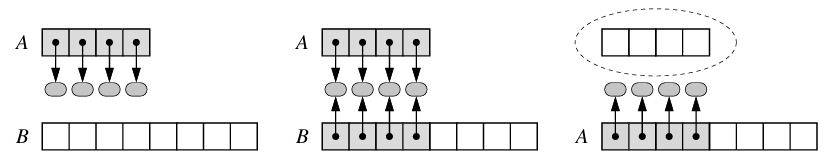

Kendimiz bir dinamik dizi yapısı kodlamak istersek:

In [ ]:
import ctypes

class myDynamicArray:

  def __init__(self):
    self._size = 0
    self._capacity = 1
    self._array = self._make_array(self._capacity)

  def __len__(self):
    return self._size

  def __getitem__(self, k):
    if not 0 <= k < self._size:
      raise IndexError('invalid index')
    return self._array[k]

  def append(self, obj):
    if self._size == self._capacity:
      self._resize(2 * self._capacity)
    self._array[self._size] = obj
    self._size += 1

  def _resize(self, c):
    B = self._make_array(c)
    for k in range(self._size):
      B[k] = self._array[k]
    self._array = B
    self._capacity = c

  def _make_array(self, c):
    return (c * ctypes.py_object)()

In [ ]:
dizi = myDynamicArray()
dizi.append(5)
dizi.append(10)
dizi.append(15)

print(len(dizi))


3


# Dizi Tabanlı Yapıların Kullanımı

Bir oyunun puan sıralamasını tutan yapı. En yüksek n puan sıralı olarak tutulacak.

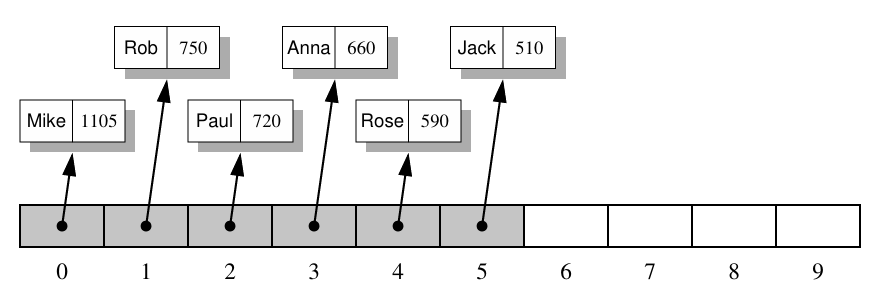

In [ ]:
class GameEntry:

  def __init__(self, name, score):
    self._name = name
    self._score = score

  def get_name(self):
    return self._name

  def get_score(self):
    return self._score

  def __str__(self):
    return '({0}, {1})'.format(self._name, self._score)

In [ ]:
e = GameEntry("ali", 100)
print(e)

(ali, 100)


In [ ]:
class Scoreboard:

  def __init__(self, capacity=10):
    self._board = [None] * capacity
    self._n = 0

  def __getitem__(self, k):
    return self._board[k]

  def __str__(self):
    return "\n".join(str(self._board[j]) for j in range(self._n))

  def add(self, entry):
    score = entry.get_score()
    good = self._n < len(self._board) or score > self._board[-1].get_score()

    if good:
      if self._n < len(self. board):
        self._n += 1

    j = self._n - 1

    while j > 0 and self._board[j-1].get_score() < score:
      self._board[j] = self._board[j-1]
      j -= 1
      self._board[j] = entry

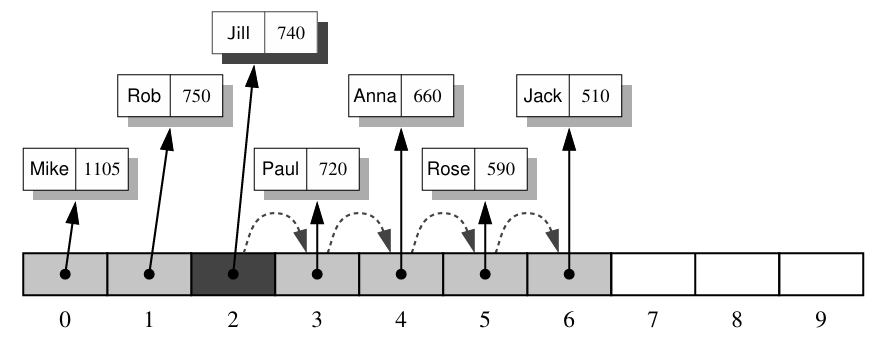

# Çok Boyutlu Liste

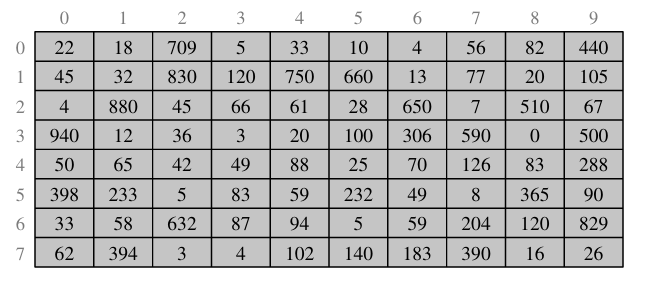

In [ ]:
data = [ [22,18,709,5,33], [45,32,830,120,750], [4,880,45,66,61] ]

print(data)

[[22, 18, 709, 5, 33], [45, 32, 830, 120, 750], [4, 880, 45, 66, 61]]


In [ ]:
data = [0] * 6
print(data)

[0, 0, 0, 0, 0, 0]


In [ ]:
data = ([0] * 6) * 3
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
data = [[0] * 6] * 3
print(data)

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [ ]:
data[0][0] = 5
print(data)

[[5, 0, 0, 0, 0, 0], [5, 0, 0, 0, 0, 0], [5, 0, 0, 0, 0, 0]]


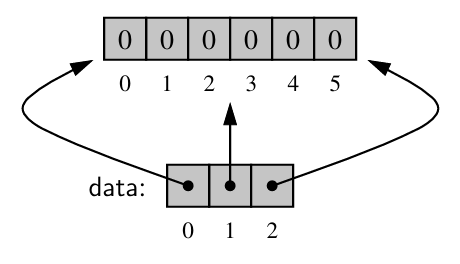

In [ ]:
data = [ [0] * 6 for j in range(3) ]
print(data)

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [ ]:
data[0][0] = 5
print(data)

[[5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


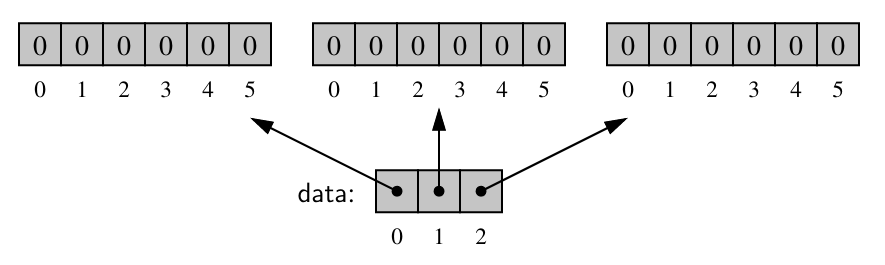